In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
PERPLEXITY=20
ITERATION_N =2000
RANDOM_STATE = 42

In [61]:
df = pd.read_csv(r"C:\Users\prAsann\Desktop\Capstone Project\Fourier_Transformed_WCT.csv")

In [62]:
df.head()

,Patient ID,Comments of Patients,Unnamed: 2,Unnamed: 3,I-Raw,I-raw(real),I-raw(imag),II-Raw,II-raw(real),II-raw(imag),...,UV4(imag),UV5,UV5(real),UV5(imag),UV6,UV6(real),UV6(imag),WCT,WCT(real),WCT(imag)
0,patient001,Age: 46,Sex: M,Diagnosis report: Non ST segment elevation myo...,0.1832743937389645-0.38316677887422790.0157715...,0.1832743937389645,0.38316677887422790.0157715527837506420.173699...,0.08839254698785978-0.46058494392519740.018574...,0.08839254698785978,0.46058494392519740.018574163208737690.2102984...,...,0.470722063741797370.024206860631505780.216772...,-0.054040679304980195-0.57966340138374240.0219...,0.054040679304980195,0.57966340138374240.0219537816623985440.267167...,-0.1948170631050768-0.691155369173090.02956479...,0.1948170631050768,0.691155369173090.029564792326333960.326568174...,-0.3170091969449017-0.79643426352645690.029001...,0.3170091969449017,0.79643426352645690.029001522584057150.3786583...
1,patient002,Age: 74,Sex: F,Diagnosis report: Coronary artery disease,-1.627792634242524-1.88706324161069162.3825633...,1.627792634242524,1.88706324161069162.382563390852816,-1.6286314086073046-1.91241947436653842.375533...,1.6286314086073046,1.91241947436653842.3755332803069313,...,1.89017171147568172.3721484122663203,-1.6131644093207493-1.91637167176631132.368489...,1.6131644093207493,1.91637167176631132.3684894658418543,-1.6213172961464173-1.9433709528793672.3583622...,1.6213172961464173,1.9433709528793672.3583622695584063,-1.6199081552135859-1.95860245521781782.350756...,1.6199081552135859,1.95860245521781782.350756594406426
2,patient003,Age: 55,Sex: M,Diagnosis report: Non ST segment elevation myo...,2.0833024665065247-2.0911828422004763-3.156475...,2.0833024665065247,2.0911828422004763,2.081892144201671-2.096825042148551-3.16831246...,2.081892144201671,2.096825042148551,...,2.074290231512567,2.0813280152797295-2.070347489380177-3.1404432...,2.0813280152797295,2.070347489380177,2.07794324174808-2.068665026142649-3.137636860...,2.07794324174808,2.068665026142649,2.079353564052934-2.066404747247788-3.13677549...,2.079353564052934,2.066404747247788
3,patient004,Age: 69,Sex: F,Diagnosis report: Atypical chest pain,-2.436623894737715-1.62188741251763210.8093928...,2.436623894737715,1.62188741251763210.80939286942137072.52163388...,-2.451270720916812-1.59400154792727040.8423342...,2.451270720916812,1.59400154792727040.84233429023056482.57371201...,...,1.63144828037718480.93607914990298792.58976441...,-2.5540195883392327-1.60668107982672480.918064...,2.5540195883392327,1.60668107982672480.91806469944535232.61453000...,-2.5120688673206115-1.5785220475832330.9011707...,2.5120688673206115,1.5785220475832330.90117070547782532.622438914...,-2.4898222728410393-1.5790911468605870.8718894...,2.4898222728410393,1.5790911468605870.87188944253631942.624114529...
4,patient005,Age: 87,Sex: M,Diagnosis report: Atrial fibrillation,-3.761482251302726-4.388166234759397-0.5582724...,3.761482251302726,4.388166234759397,-3.7668295119824955-4.395488174341192-0.559104...,3.7668295119824955,4.395488174341192,...,4.409008581293819,-3.7459974755842267-4.396049910446674-0.581074...,3.7459974755842267,4.396049910446674,-3.7510662331035918-4.408446845188338-0.589796...,3.7510662331035918,4.408446845188338,-3.755577984302147-4.4081562920303305-0.587553...,3.755577984302147,4.4081562920303305


In [5]:
features = ['I-raw(real)','I-raw(imag)','II-raw(real)','II-raw(imag)','III-raw(real)','III-raw(imag)','V1-Raw(real)',
            'V1-Raw(imag)','V2-Raw(real)','V2-Raw(imag)','V3-Raw(real)','V3-Raw(imag)','V4-Raw(real)','V4-Raw(imag)',
            'V5-Raw(real)','V5-Raw(imag)','V6-Raw(real)','V6-Raw(imag)','LA-Raw(real)','LA-Raw(imag)','RA-Raw(real)',
            'RA-Raw(imag)','LL-Raw(real)','LL-Raw(imag)','UV1-Raw(real)','UV1-Raw(imag)','UV2-Raw(real)','UV2-Raw(imag)',
            'UV3-Raw(real)','UV3-Raw(imag)','UV4-Raw(real)','UV4-Raw(imag)','UV5-Raw(real)','UV5-Raw(imag)',
            'UV6-Raw(real)','UV6-Raw(imag)','I(real)','I(imag)','II(real)','II(imag)','III(real)','III(imag)','V1(real)',
            'V1(imag)','V2(real)','V2(imag)','V3(real)','V3(imag)','V4(real)','V4(imag)','V5(real)','V5(imag)',
            'V6(real)','V6(imag)','LA(real)','LA(imag)','RA(real)','RA(imag)','LL(real)','LL(imag)','UV1(real)',
            'UV1(imag)','UV2(real)','UV2(imag)','UV3(real)','UV3(imag)','UV4(real)','UV4(imag)','UV5(real)',
            'UV5(imag)','UV6(real)','UV6(imag)','WCT(real)','WCT(imag)']

In [6]:
temp = pd.DataFrame(df[features])

In [70]:
def modify_data(data):
    y = data
    result=[]
    for x in y:
        if len(x)>=5:
            new = x.split('.')
            i = new[0]+'.'+new[1]
            j = float(i)
            result.append(j)
    return result

In [8]:
temp.head()

,I-raw(real),I-raw(imag),II-raw(real),II-raw(imag),III-raw(real),III-raw(imag),V1-Raw(real),V1-Raw(imag),V2-Raw(real),V2-Raw(imag),...,UV3(real),UV3(imag),UV4(real),UV4(imag),UV5(real),UV5(imag),UV6(real),UV6(imag),WCT(real),WCT(imag)
0,0.1832743937389645,0.38316677887422790.0157715527837506420.173699...,0.08839254698785978,0.46058494392519740.018574163208737690.2102984...,0.04307790481132811,0.56615814175711080.0233688251612890650.264073...,0.18382667456987897,0.6832745760253460.0270232093428898240.3226264...,0.30347831658749735,0.79278817043113140.023080321146952160.3783720...,...,0.17314004049168413,0.39188143187785340.0171728579962441670.181021...,0.07883808861303958,0.470722063741797370.024206860631505780.216772...,0.054040679304980195,0.57966340138374240.0219537816623985440.267167...,0.1948170631050768,0.691155369173090.029564792326333960.326568174...,0.3170091969449017,0.79643426352645690.029001522584057150.3786583...
1,1.627792634242524,1.88706324161069162.382563390852816,1.6286314086073046,1.91241947436653842.3755332803069313,1.6325904236090694,1.9340899499967542.3752454980038835,1.636247479839513,1.95718144042239372.365954240791194,1.6348383389066816,1.97041464070477962.362857155053631,...,1.6052799302918113,1.8760947836585132.370462830205611,1.6072258868181024,1.89017171147568172.3721484122663203,1.6131644093207493,1.91637167176631132.3684894658418543,1.6213172961464173,1.9433709528793672.3583622695584063,1.6199081552135859,1.95860245521781782.350756594406426
2,2.0833024665065247,2.0911828422004763,2.081892144201671,2.096825042148551,2.0740199815182137,2.1106076450337565,2.0711993369085056,2.1100468239545807,2.0824562731236127,2.1058321685716814,...,2.0833024665065247,2.061629270785713,2.0799176929748753,2.074290231512567,2.0813280152797295,2.070347489380177,2.07794324174808,2.068665026142649,2.079353564052934,2.066404747247788
3,2.436623894737715,1.62188741251763210.80939286942137072.52163388...,2.451270720916812,1.59400154792727040.84233429023056482.57371201...,2.4760321478158143,1.55571254854687150.90398429621965372.63198992...,2.4957362743548637,1.53488351499570340.93551892165793362.66466442...,2.494050507568213,1.51068541372259760.94790619063191252.67816988...,...,2.5540195883392327,1.63229054730766920.92397821980981462.55571590...,2.584142306330206,1.63144828037718480.93607914990298792.58976441...,2.5540195883392327,1.60668107982672480.91806469944535232.61453000...,2.5120688673206115,1.5785220475832330.90117070547782532.622438914...,2.4898222728410393,1.5790911468605870.87188944253631942.624114529...
4,3.761482251302726,4.388166234759397,3.7668295119824955,4.395488174341192,3.7589571559817236,4.397173382657638,3.7648614229823028,4.401124905606543,3.7651399261427074,4.405347611502922,...,3.7521988126225705,4.398025671921126,3.7536098953019543,4.409008581293819,3.7459974755842267,4.396049910446674,3.7510662331035918,4.408446845188338,3.755577984302147,4.4081562920303305


In [9]:
new_df = temp.apply(modify_data)
new_df.shape

(92, 74)

In [10]:
tsne = TSNE(n_components=2, perplexity=PERPLEXITY, n_iter=ITERATION_N, random_state=RANDOM_STATE)
points = tsne.fit_transform(new_df)
x_point = points[:,0]
y_point = points[:,1]
points.shape

(92, 2)

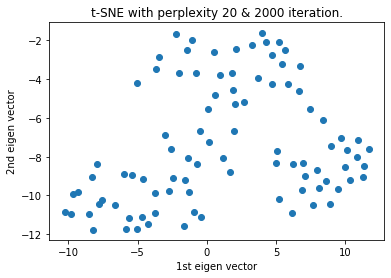

In [11]:
plt.scatter(x_point,y_point)
plt.xlabel("1st eigen vector")
plt.ylabel("2nd eigen vector")
plt.title(f"t-SNE with perplexity {PERPLEXITY} & {ITERATION_N} iteration.")
plt.show()

In [104]:
import plotly as py
import plotly.graph_objects as go
import ipywidgets as widgets
from ipywidgets import interact
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Set-Up offline mode
py.offline.init_notebook_mode(connected=True)

In [105]:
def f(Perplexity,Iteration):
    tsne = TSNE(n_components=2, perplexity=Perplexity, n_iter=Iteration, random_state=RANDOM_STATE)
    points = tsne.fit_transform(new_df)
    x_point = points[:,0]
    y_point = points[:,1]
    trace = go.Scatter(
        x = x_point,
        y = y_point,
        mode = 'markers')
    data = [trace]
    iplot(data)
interact(f,Perplexity=(0,50),Iteration=(100,500))


interactive(children=(IntSlider(value=25, description='Perplexity', max=50), IntSlider(value=300, description=…

<function __main__.f(Perplexity, Iteration)>

## K-Means clustering

### Import Dataset 

In [14]:
dataset = new_df
X = dataset.iloc[:,[-1,-2]].values

### Using the elbow method to find optimal number of clusters

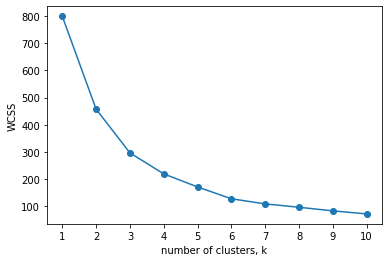

In [15]:
from sklearn.cluster import KMeans
ks = range(1, 11)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, init= 'k-means++', random_state = 42)
    
    # Fit model to samples
    model.fit(new_df.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('WCSS')
plt.xticks(ks)
plt.show()

### Training K-Means Model 

In [137]:
kmeans = KMeans(n_clusters=2, init= 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

### Visualization of K-Means clusters with their respective Centroids 

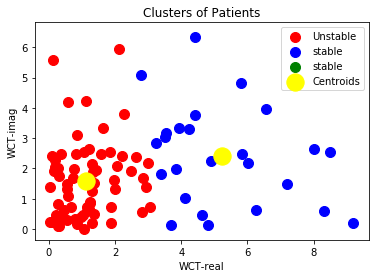

In [138]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1], s = 100, c = 'red', label = 'Unstable')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1], s = 100, c = 'blue', label = 'stable')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1], s = 100, c = 'green', label = 'stable')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Patients')
plt.xlabel('WCT-real')
plt.ylabel('WCT-imag')
plt.legend()
plt.show()

### DBSCAN clustering algorithm implimentaion on WCT 

In [18]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from collections import Counter

In [19]:
dataset = new_df
X = dataset.iloc[:,[-1,-2]].values

In [120]:
db =DBSCAN(eps=0.5, min_samples=8) # epsilon is chosen less as our data is more scattered
model = db.fit(X)

In [142]:
labels = db.labels_
labels

array([ 0, -1, -1, -1, -1, -1,  0, -1,  1,  0, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0, -1,  1,  0,  1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1,  0,  0, -1, -1,  1,  1,  1,  0,  0, -1,  1,  0,
        0, -1,  0,  0, -1, -1, -1,  0,  0,  0,  0, -1,  1,  0,  0,  1,  0,
       -1,  1,  0,  0,  0,  0,  1], dtype=int64)

In [122]:
outlier_df = pd.DataFrame(X)

In [123]:
print(Counter(db.labels_))

print(outlier_df[db.labels_==-1])

Counter({-1: 54, 0: 25, 1: 13})
           0         1
1   1.958602  1.619908
2   2.066405  2.079354
3   1.579091  2.489822
4   4.408156  3.755578
5   3.398879  1.810222
7   3.055987  0.725776
10  6.017072  2.183817
11  3.542453  3.175056
12  1.220432  2.654808
13  8.501265  2.552625
14  4.901665  2.238713
15  2.995741  2.186054
16  2.219282  2.417185
18  3.838923  1.975461
19  0.839243  3.108911
20  3.941943  3.320325
21  2.794718  5.086363
22  9.173582  0.183841
23  2.833860  1.700147
24  1.876945  0.713100
25  6.556201  3.966728
26  5.828478  2.481384
28  4.823984  0.121900
29  3.684920  0.122768
30  1.111188  4.211098
31  4.108337  1.035184
32  0.115713  5.582973
33  1.418340  1.952106
34  4.235022  3.296683
35  3.230800  2.840329
36  1.054593  2.535150
37  1.333600  1.895800
38  2.477443  1.927329
39  1.627517  3.345402
40  2.267138  3.811316
42  3.513745  3.021920
46  2.922545  1.376967
47  1.318397  2.158194
48  8.001559  2.653407
49  5.813547  4.813282
50  2.818939  0.564747
51

In [ ]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y2, data=results, legend='full')

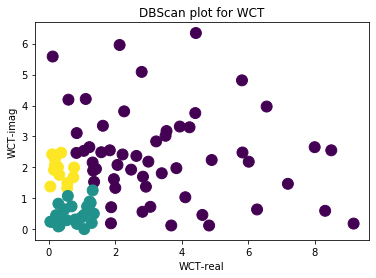

In [155]:
color = db.labels_
plt.scatter(X[:,0],X[:,1], c = color, s =120)
plt.xlabel('WCT-real')
plt.ylabel('WCT-imag')
plt.title('DBScan plot for WCT')
# plt.legend()
plt.show()

In [66]:
features1 = ['Patient ID','I-raw(real)','I-raw(imag)','II-raw(real)','II-raw(imag)','III-raw(real)','III-raw(imag)','V1-Raw(real)',
            'V1-Raw(imag)','V2-Raw(real)','V2-Raw(imag)','V3-Raw(real)','V3-Raw(imag)','V4-Raw(real)','V4-Raw(imag)',
            'V5-Raw(real)','V5-Raw(imag)','V6-Raw(real)','V6-Raw(imag)','LA-Raw(real)','LA-Raw(imag)','RA-Raw(real)',
            'RA-Raw(imag)','LL-Raw(real)','LL-Raw(imag)','UV1-Raw(real)','UV1-Raw(imag)','UV2-Raw(real)','UV2-Raw(imag)',
            'UV3-Raw(real)','UV3-Raw(imag)','UV4-Raw(real)','UV4-Raw(imag)','UV5-Raw(real)','UV5-Raw(imag)',
            'UV6-Raw(real)','UV6-Raw(imag)','I(real)','I(imag)','II(real)','II(imag)','III(real)','III(imag)','V1(real)',
            'V1(imag)','V2(real)','V2(imag)','V3(real)','V3(imag)','V4(real)','V4(imag)','V5(real)','V5(imag)',
            'V6(real)','V6(imag)','LA(real)','LA(imag)','RA(real)','RA(imag)','LL(real)','LL(imag)','UV1(real)',
            'UV1(imag)','UV2(real)','UV2(imag)','UV3(real)','UV3(imag)','UV4(real)','UV4(imag)','UV5(real)',
            'UV5(imag)','UV6(real)','UV6(imag)','WCT(real)','WCT(imag)']

In [67]:
df.head()

,Patient ID,Comments of Patients,Unnamed: 2,Unnamed: 3,I-Raw,I-raw(real),I-raw(imag),II-Raw,II-raw(real),II-raw(imag),...,UV4(imag),UV5,UV5(real),UV5(imag),UV6,UV6(real),UV6(imag),WCT,WCT(real),WCT(imag)
0,patient001,Age: 46,Sex: M,Diagnosis report: Non ST segment elevation myo...,0.1832743937389645-0.38316677887422790.0157715...,0.1832743937389645,0.38316677887422790.0157715527837506420.173699...,0.08839254698785978-0.46058494392519740.018574...,0.08839254698785978,0.46058494392519740.018574163208737690.2102984...,...,0.470722063741797370.024206860631505780.216772...,-0.054040679304980195-0.57966340138374240.0219...,0.054040679304980195,0.57966340138374240.0219537816623985440.267167...,-0.1948170631050768-0.691155369173090.02956479...,0.1948170631050768,0.691155369173090.029564792326333960.326568174...,-0.3170091969449017-0.79643426352645690.029001...,0.3170091969449017,0.79643426352645690.029001522584057150.3786583...
1,patient002,Age: 74,Sex: F,Diagnosis report: Coronary artery disease,-1.627792634242524-1.88706324161069162.3825633...,1.627792634242524,1.88706324161069162.382563390852816,-1.6286314086073046-1.91241947436653842.375533...,1.6286314086073046,1.91241947436653842.3755332803069313,...,1.89017171147568172.3721484122663203,-1.6131644093207493-1.91637167176631132.368489...,1.6131644093207493,1.91637167176631132.3684894658418543,-1.6213172961464173-1.9433709528793672.3583622...,1.6213172961464173,1.9433709528793672.3583622695584063,-1.6199081552135859-1.95860245521781782.350756...,1.6199081552135859,1.95860245521781782.350756594406426
2,patient003,Age: 55,Sex: M,Diagnosis report: Non ST segment elevation myo...,2.0833024665065247-2.0911828422004763-3.156475...,2.0833024665065247,2.0911828422004763,2.081892144201671-2.096825042148551-3.16831246...,2.081892144201671,2.096825042148551,...,2.074290231512567,2.0813280152797295-2.070347489380177-3.1404432...,2.0813280152797295,2.070347489380177,2.07794324174808-2.068665026142649-3.137636860...,2.07794324174808,2.068665026142649,2.079353564052934-2.066404747247788-3.13677549...,2.079353564052934,2.066404747247788
3,patient004,Age: 69,Sex: F,Diagnosis report: Atypical chest pain,-2.436623894737715-1.62188741251763210.8093928...,2.436623894737715,1.62188741251763210.80939286942137072.52163388...,-2.451270720916812-1.59400154792727040.8423342...,2.451270720916812,1.59400154792727040.84233429023056482.57371201...,...,1.63144828037718480.93607914990298792.58976441...,-2.5540195883392327-1.60668107982672480.918064...,2.5540195883392327,1.60668107982672480.91806469944535232.61453000...,-2.5120688673206115-1.5785220475832330.9011707...,2.5120688673206115,1.5785220475832330.90117070547782532.622438914...,-2.4898222728410393-1.5790911468605870.8718894...,2.4898222728410393,1.5790911468605870.87188944253631942.624114529...
4,patient005,Age: 87,Sex: M,Diagnosis report: Atrial fibrillation,-3.761482251302726-4.388166234759397-0.5582724...,3.761482251302726,4.388166234759397,-3.7668295119824955-4.395488174341192-0.559104...,3.7668295119824955,4.395488174341192,...,4.409008581293819,-3.7459974755842267-4.396049910446674-0.581074...,3.7459974755842267,4.396049910446674,-3.7510662331035918-4.408446845188338-0.589796...,3.7510662331035918,4.408446845188338,-3.755577984302147-4.4081562920303305-0.587553...,3.755577984302147,4.4081562920303305


In [74]:
temp1 = pd.DataFrame(df[features1])

In [75]:
temp1.head()

,Patient ID,I-raw(real),I-raw(imag),II-raw(real),II-raw(imag),III-raw(real),III-raw(imag),V1-Raw(real),V1-Raw(imag),V2-Raw(real),...,UV3(real),UV3(imag),UV4(real),UV4(imag),UV5(real),UV5(imag),UV6(real),UV6(imag),WCT(real),WCT(imag)
0,patient001,0.1832743937389645,0.38316677887422790.0157715527837506420.173699...,0.08839254698785978,0.46058494392519740.018574163208737690.2102984...,0.04307790481132811,0.56615814175711080.0233688251612890650.264073...,0.18382667456987897,0.6832745760253460.0270232093428898240.3226264...,0.30347831658749735,...,0.17314004049168413,0.39188143187785340.0171728579962441670.181021...,0.07883808861303958,0.470722063741797370.024206860631505780.216772...,0.054040679304980195,0.57966340138374240.0219537816623985440.267167...,0.1948170631050768,0.691155369173090.029564792326333960.326568174...,0.3170091969449017,0.79643426352645690.029001522584057150.3786583...
1,patient002,1.627792634242524,1.88706324161069162.382563390852816,1.6286314086073046,1.91241947436653842.3755332803069313,1.6325904236090694,1.9340899499967542.3752454980038835,1.636247479839513,1.95718144042239372.365954240791194,1.6348383389066816,...,1.6052799302918113,1.8760947836585132.370462830205611,1.6072258868181024,1.89017171147568172.3721484122663203,1.6131644093207493,1.91637167176631132.3684894658418543,1.6213172961464173,1.9433709528793672.3583622695584063,1.6199081552135859,1.95860245521781782.350756594406426
2,patient003,2.0833024665065247,2.0911828422004763,2.081892144201671,2.096825042148551,2.0740199815182137,2.1106076450337565,2.0711993369085056,2.1100468239545807,2.0824562731236127,...,2.0833024665065247,2.061629270785713,2.0799176929748753,2.074290231512567,2.0813280152797295,2.070347489380177,2.07794324174808,2.068665026142649,2.079353564052934,2.066404747247788
3,patient004,2.436623894737715,1.62188741251763210.80939286942137072.52163388...,2.451270720916812,1.59400154792727040.84233429023056482.57371201...,2.4760321478158143,1.55571254854687150.90398429621965372.63198992...,2.4957362743548637,1.53488351499570340.93551892165793362.66466442...,2.494050507568213,...,2.5540195883392327,1.63229054730766920.92397821980981462.55571590...,2.584142306330206,1.63144828037718480.93607914990298792.58976441...,2.5540195883392327,1.60668107982672480.91806469944535232.61453000...,2.5120688673206115,1.5785220475832330.90117070547782532.622438914...,2.4898222728410393,1.5790911468605870.87188944253631942.624114529...
4,patient005,3.761482251302726,4.388166234759397,3.7668295119824955,4.395488174341192,3.7589571559817236,4.397173382657638,3.7648614229823028,4.401124905606543,3.7651399261427074,...,3.7521988126225705,4.398025671921126,3.7536098953019543,4.409008581293819,3.7459974755842267,4.396049910446674,3.7510662331035918,4.408446845188338,3.755577984302147,4.4081562920303305


In [ ]:
trace1 = go.Scatter(
    x=clusterdata['diabetes'],
    y=clusterdata['glucose'],
    z=clusterdata['bmi'],
    mode='markers',
    marker=dict(
        size=12,
        color=clusterdata['cluster'],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)


In [98]:
hover = temp['Patient ID'].to_list()


In [139]:
points1 = temp1.iloc[:,[-1,-2]].values
# hover = temp.iloc[0]
x_point = X[:,0]
y_point = X[:,1]
trace = go.Scatter(
                  x = x_point,
                  y = y_point,
                  mode = 'markers',
                  hovertext = hover,
                  )
data = [trace]
iplot(data)